In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
driver = webdriver.Chrome()

In [13]:
product_names = []   
prices = []

In [14]:
driver.get("https://www.amazon.com/s?k=phones&rh=p_36%3A10000-2000000&s=exact-aware-popularity-rank&crid=37AO5KAQX0UZR&qid=1694243853&rnid=14674871011&sprefix=phones%2Caps%2C1957&ref=sr_nr_p_36_7")
content = driver.page_source
soup = BeautifulSoup(content, 'html.parser')

In [15]:
# Iterate through each product search result# 
for each in soup.findAll('div', attrs={'data-component-type': 's-search-result'}): 
     # Find the product name element
    name = each.find('h2', attrs={'class':'a-size-mini a-spacing-none a-color-base s-line-clamp-2'})
     # Find the product price element
    price = each.find('span', attrs={'class':'a-price-whole'})
    # Append product name and priceto their respective lists (handling None cases)
    if name is None:    
        product_names.append(None)
    else:
        product_names.append(name.text.strip()) # Get the text part

    if price is None:
        prices.append(None)
    else:
        prices.append(price.text.strip())
    

In [16]:
# Create a DataFrame to store the collected data
df = pd.DataFrame({'Product Name': product_names, 'Price': prices}) 
print(df.to_string())

                                                                                                                                                                                             Product Name Price
0                                                                                        Motorola Moto G Stylus 5G | 2021 | 2-Day Battery | Unlocked | Made for US 4/128GB | 48MP Camera | Cosmic Emerald  149.
1        SAMSUNG Galaxy A14 5G A Series Cell Phone, Factory Unlocked Android Smartphone, 64GB w/Expandable Storage, Long Battery Life, 13MP Camera, 6.6" Infinite Display Screen, US Version, 2023, Black  195.
2                                     SAMSUNG Galaxy A14 4G LTE (128GB + 4GB) Unlocked Worldwide (Only T-Mobile/Mint/Metro USA Market) 6.6" 50MP Triple Camera + (15W Wall Charger) (Black (SM-A145M/DS))  138.
3                                                                                        Google Pixel 6a - 5G Android Phone - Unlocked Smartphone with 12 Megapixel Came

In [9]:
df.to_csv('project.csv', index = False)

In [17]:
df2 = pd.read_csv("project.csv")

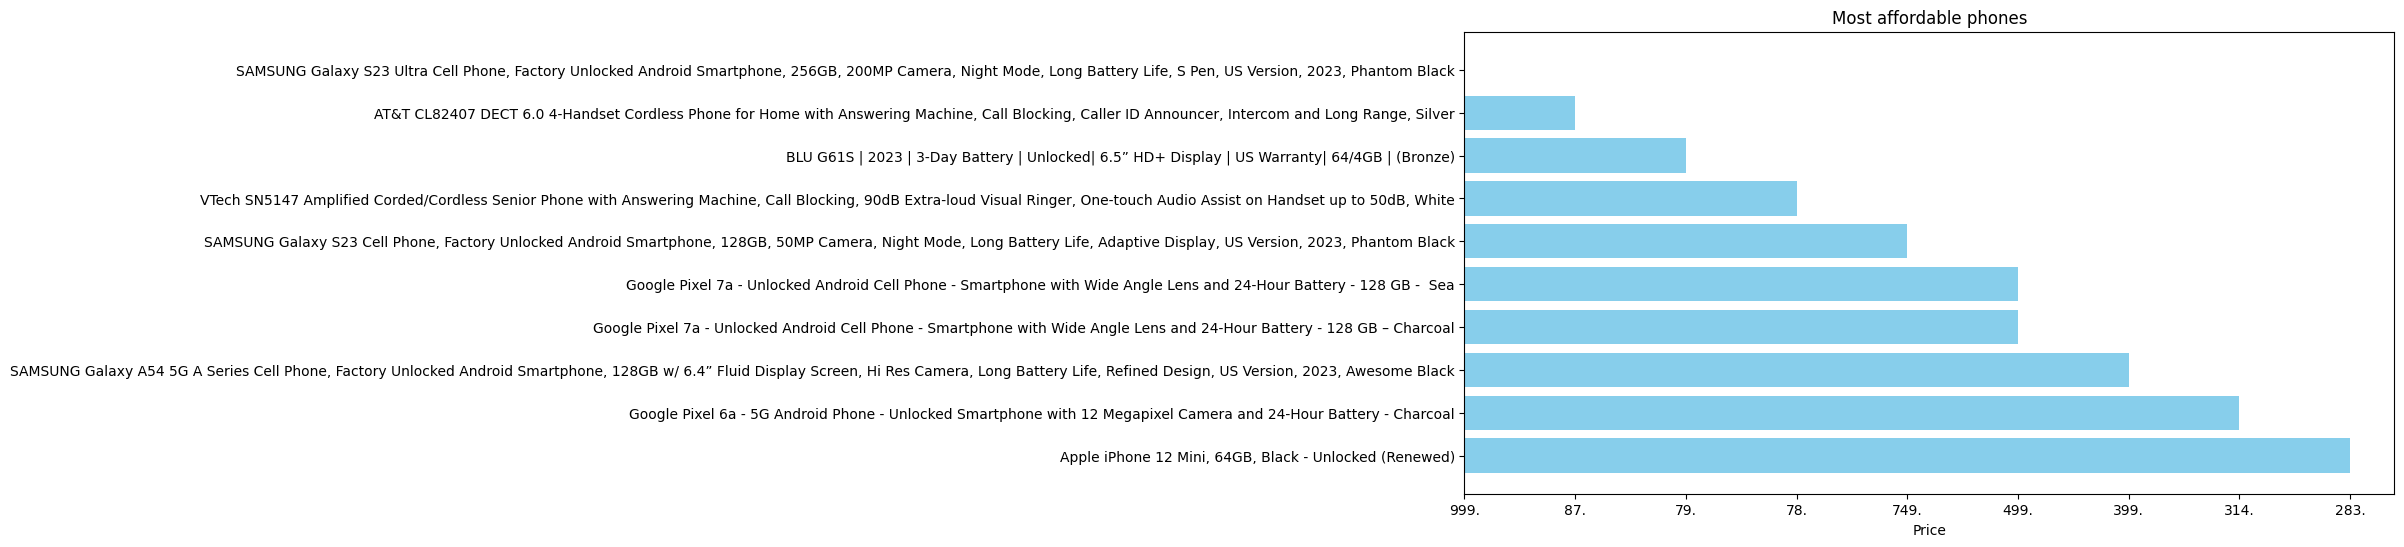

In [18]:
# Filter out rows with None values in the 'Rate' column
df_filtered = df.dropna(subset=['Price'])

# Sort the DataFrame by rating in descending order and take the top 10 products
most_affordable_phones = df_filtered.sort_values(by='Price', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(most_affordable_phones['Product Name'], most_affordable_phones['Price'], color='skyblue')
plt.xlabel('Price')
plt.title('Most affordable phones')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest price at the top
plt.show()


In [19]:
driver.quit()